# Lab 1
### William Olsen

In this lab we will be becoming familiar with git & Github as well as some distributions and probabilities.

In [1]:
# first lets import the required packages
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

## A Little Statistics

### Part 1

Recall that in physics we perform a translation and represent probabilities using `sigmas`.  Let us explore this translation using the standard normal distribution as our data source (which is also the source used to determine the related sigma value for a given probability).

We would like to see what probabilities that we get for certain sigma values.  We often would like to look at multiple values of sigma when we are observing the related probabilities.  We will use $\sigma = 1, 2, 5$ as our values - these values are refered to as our _**canidates**_.  Now to determine the probability of a specific value we must integrate the probability density function for the normal distribution.  This integration is equivalent to calculating the value of the cumulative distribution function, or the cdf.

In [2]:
# specify the sigma values to try
sigma_1 = 1
sigma_2 = 2
sigma_5 = 5

# calcualate the probabilities associated with each value
prob_sigma_1 = stats.norm.cdf(sigma_1)
prob_sigma_2 = stats.norm.cdf(sigma_2)
prob_sigma_5 = stats.norm.cdf(sigma_5)

print(f'Probability = {prob_sigma_1} for Sigma = {sigma_1}')
print(f'Probability = {prob_sigma_2} for Sigma = {sigma_2}')
print(f'Probability = {prob_sigma_5} for Sigma = {sigma_5}')

Probability = 0.8413447460685429 for Sigma = 1
Probability = 0.9772498680518208 for Sigma = 2
Probability = 0.9999997133484281 for Sigma = 5


Now that we have the probabilities above for each value of sigma we will explore translating this probability back into a sigma.  As we are drawing our data from the normal distribution and we calculate sigma using the normal distribution we expect that when we calculate the sigma from our probabilities we will recover the original sigma values used previously.

In [3]:
# using the previously calculated probabilities lets determine what sigma was found for that probability
sigma_1_prime = stats.norm.ppf(prob_sigma_1)
sigma_2_prime = stats.norm.ppf(prob_sigma_2)
sigma_5_prime = stats.norm.ppf(prob_sigma_5)

print(f'For Probability = {prob_sigma_1} got Sigma = {sigma_1_prime}.  Expected Sigma = {sigma_1}.')
print(f'For Probability = {prob_sigma_2} got Sigma = {sigma_2_prime}.  Expected Sigma = {sigma_2}.')
print(f'For Probability = {prob_sigma_5} got Sigma = {sigma_5_prime}.  Expected Sigma = {sigma_5}.')

For Probability = 0.8413447460685429 got Sigma = 1.0.  Expected Sigma = 1.
For Probability = 0.9772498680518208 got Sigma = 2.0000000000000004.  Expected Sigma = 2.
For Probability = 0.9999997133484281 got Sigma = 4.999999999970176.  Expected Sigma = 5.


We see above that the conversion from the data source to a probability and then to a sigma is correct and we recover, approximatly, the same value of sigma.  This was our expectation as we originally drew our values from the normal distribution so the same value should be recovered.  As we continue we will no longer be drawing our data from the normal distribution so the sigma value will, generally, not match the _**canidate**_ value.

### Part 2

Next we will explore a continous distribution.  Here we will be looking at the Rayleigh distribution specifically.  This distribution is a continuous distribution for a collection of non-negative random variables.  Commonly Rayleigh distributions arise in nature when the components of a vector are related to the magnitude of said vector.

The Rayleigh distribution has the following functions of interest:

$$\text{pdf} = \frac{x}{\sigma^2} e^{-x^2 / (2\sigma^2)} \text{, cdf} = 1 - e^{-x^2 / (2\sigma^2)}$$

Where pdf is the _probability density function_ and cdf is the _cumulative distribution function_ which are both only defined when $x \ge 0$.

We will now make an analytic plot of the function and of 100k random draws from the function to see the behavior of the central limit theorem with the Rayleigh distribution.

In [14]:
# general graphing setup
plt.rcParams["figure.figsize"] = (15,10)

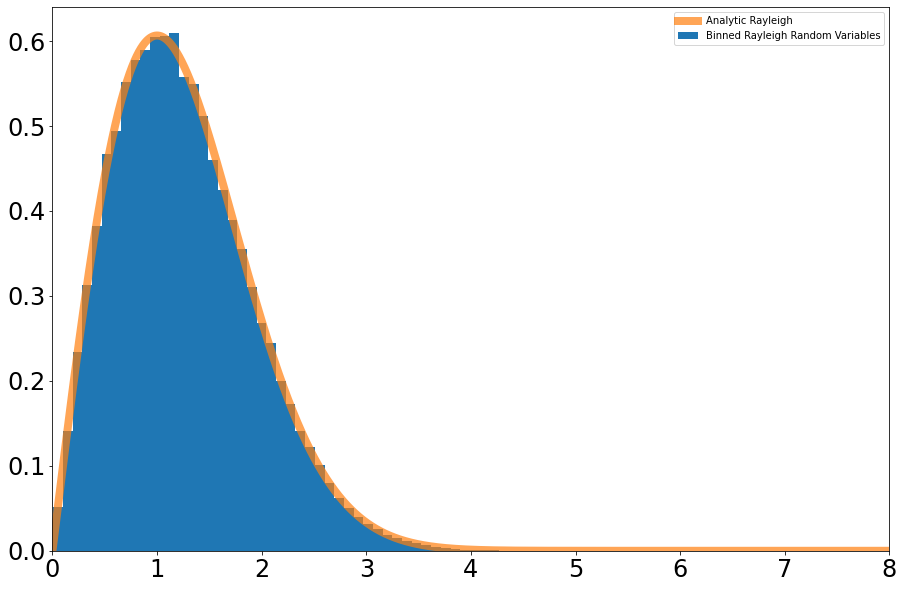

In [24]:
# lets first draw the the 100k points from the distribution
draw = stats.rayleigh.rvs(size=100000)

# now lets group those points into bins and normalize
fig, ax = plt.subplots(1, 1)
ax.hist(draw, bins=50, density=True, label='Binned Rayleigh Random Variables')

# lets plot the analytical function
limits = [0, 8]
x = np.linspace(limits[0], limits[1], 10000)
plt.plot(x, stats.rayleigh.pdf(x), linewidth=8, alpha=0.7, label='Analytic Rayleigh')

# adjust information about the graph
plt.tick_params(labelsize=24)
plt.xlim(limits)
plt.legend()

plt.show()

Lets look at the same plot but in semi-log space.

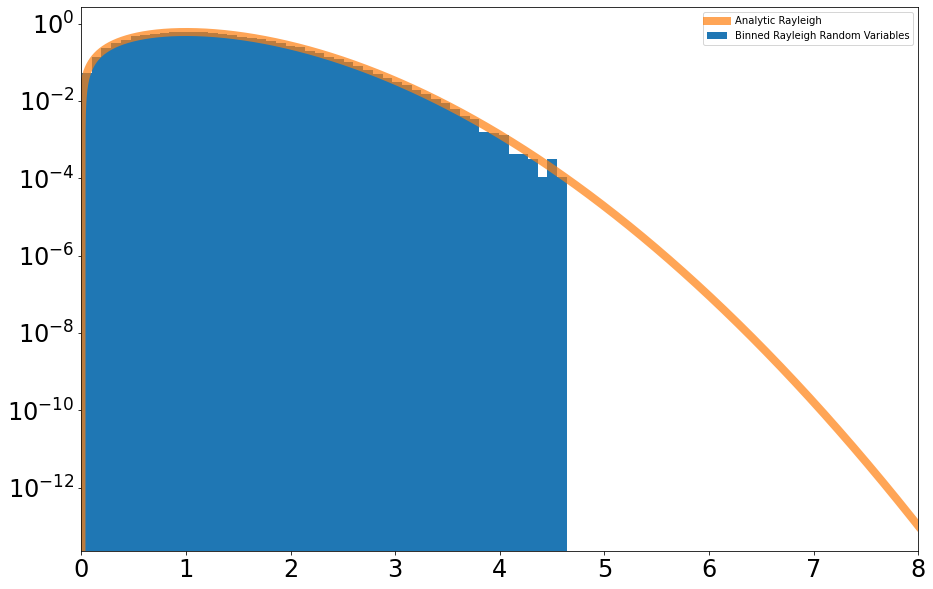

In [26]:
# lets group the previous points into bins and normalize
fig, ax = plt.subplots(1, 1)
ax.hist(draw, bins=50, density=True, label='Binned Rayleigh Random Variables')

# lets plot the analytical function
limits = [0, 8]
x = np.linspace(limits[0], limits[1], 10000)
plt.plot(x, stats.rayleigh.pdf(x), linewidth=8, alpha=0.7, label='Analytic Rayleigh')

# adjust information about the graph
plt.yscale('log')
plt.tick_params(labelsize=24)
plt.xlim(limits)
plt.legend()

plt.show()

### Part 3

Suppose that we have a signal-free source which we are collecting data from.  Further suppose that this source follows the Rayleigh distribution.

Now let's suppose that we have observed a signal with value $3.5$.  

I would like to ask the following question:

> What is the probability that my signal-free source produces a signal that is equally or more signal like than the signal I have observed?

Mathematically, this question can be represetned with the following integral:

$$\text{Probability} = \int_{3.5}^{\infty} \text{pdf}(x) dx = \int_{3.5}^{\infty} \frac{x}{\sigma^2} e^{-x^2 / (2\sigma^2)} dx$$

Now let us calculate this probability...

In [27]:
# let's calculate the above integral
canidate = 7
canidate_probability = stats.rayleigh.cdf(canidate)
print(f'Given caidate = {canidate}, Probability = {canidate_probability}')

# now lets convert our probability to a sigma
canidate_sigma = stats.norm.ppf(canidate_probability)
print(f'Sigma = {canidate_sigma}')


Given caidate = 7, Probability = 0.9999999999771026
Sigma = 6.584003279955654
